In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lared_dataset.constants import (
    vad_path,
    mnm_labels_path)
from utils import load_vad, get_turns, get_turn_lengths


In [20]:
def get_mnm_turn_lengths():
    d = pd.read_csv(mnm_labels_path)
    d = d.iloc[:,3::9]

    turn_lengths = []
    for col in range(d.shape[1]):
        turns = get_turns(d.iloc[:,col].to_numpy().squeeze())
        for t in turns:
            turn_lengths.append((t[1] - t[0]) / 20)

    return turn_lengths

In [21]:
vad = load_vad(vad_path)
tl_lared = get_turn_lengths(vad)

tl_mnm = get_mnm_turn_lengths()

[Text(0.5, 0, 'Time(s)')]

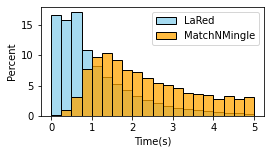

In [38]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.histplot(tl_lared, bins=20, binrange=[0, 5], color="skyblue", stat="percent", label='LaRed', ax=ax)
sns.histplot(tl_mnm, bins=20, binrange=[0,5], color="orange", stat="percent", label='MatchNMingle', ax=ax)
ax.legend()
ax.set(xlabel='Time(s)')

In [39]:
fig.savefig('turn_length_distrib.png', dpi=300, bbox_inches='tight')
